In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [109]:
LData_url='D:/study/s7 files/UG Project Files/Project Code/Final_Year_Project/Data/final data/DATA_1.csv'
LData=pd.read_csv(LData_url)
LData.drop(['Unnamed: 0'],inplace=True,axis=1)
LData.describe()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,0.015695,1.511233,-1.484457,2.995689,0.340987,0.210737,0.233431,1.558450,0.341765,4.138335,1.385590,5.929424,2.407340,-0.041159,7.631718,4.496916
std,0.006550,1.534459,1.555171,3.083427,0.307405,0.347044,0.191965,1.579396,0.307011,1.114019,0.203914,2.616864,3.919057,0.187774,4.276673,2.872056
min,0.001182,0.152706,-7.046256,0.334202,0.059122,0.003495,0.048859,0.167518,0.060425,2.033883,1.177267,2.438684,-0.906872,-1.942822,2.803157,0.000000
25%,0.011247,0.438353,-1.935168,0.853863,0.135197,0.018278,0.107424,0.449827,0.135988,3.245884,1.251209,4.070945,-0.042497,-0.108250,4.812765,2.000000
50%,0.013726,0.740689,-0.697714,1.454258,0.189446,0.035890,0.148514,0.763637,0.191254,3.861847,1.295699,5.021995,0.714626,-0.005380,6.051573,4.000000
75%,0.018762,2.074784,-0.408730,4.030658,0.535160,0.286396,0.328346,2.144437,0.535271,4.795622,1.468746,7.055444,3.773828,0.062132,9.194964,7.000000
max,0.039079,7.477779,-0.159799,14.524035,1.261335,1.590967,0.829399,7.477779,1.261407,10.426920,2.442496,21.205508,32.140158,0.959471,30.633509,9.000000


In [87]:
Data_modified=LData
del Data_modified['Label']
del Data_modified['FAULT TYPE']
Data_modified

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.021097,1.548135,-1.476162,3.024297,0.298938,0.089364,0.203990,1.548135,0.299681,5.165940,1.469099,7.589278,4.553056,-0.097854,9.597586,0
1,0.021229,1.362467,-1.394594,2.757061,0.277990,0.077279,0.192230,1.394594,0.278800,5.002138,1.450347,7.254836,4.696206,-0.014078,9.109635,0
2,0.020257,1.572543,-1.220400,2.792943,0.295425,0.087276,0.202346,1.572543,0.296119,5.310510,1.463429,7.771555,3.735528,-0.073138,9.953077,0
3,0.020035,1.432770,-1.398975,2.831745,0.268501,0.072093,0.181403,1.432770,0.269247,5.321394,1.484250,7.898281,5.582666,0.058976,10.071042,0
4,0.019870,1.271302,-1.161362,2.432664,0.286134,0.081873,0.196291,1.271302,0.286824,4.432349,1.461213,6.476605,3.587559,-0.067984,8.281395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.016535,0.166684,-0.167518,0.334202,0.059701,0.003564,0.050273,0.167518,0.061948,2.704159,1.232241,3.332175,-0.173194,-0.221345,3.904493,9
2914,0.017510,0.188588,-0.197559,0.386147,0.063149,0.003988,0.053922,0.197559,0.065532,3.014705,1.215309,3.663797,-0.351542,-0.220355,4.252686,9
2915,0.016256,0.317513,-0.345884,0.663397,0.074575,0.005561,0.060085,0.345884,0.076326,4.531677,1.270296,5.756570,0.970344,-0.270964,6.828517,9
2916,0.015766,0.196307,-0.192761,0.389068,0.066686,0.004447,0.056439,0.196307,0.068524,2.864789,1.214125,3.478213,-0.334677,-0.280929,4.021315,9


In [88]:
scaler=StandardScaler()
scaler.fit(Data_modified.drop('Label_no',axis=1))
scaled_features=scaler.transform(Data_modified.drop('Label_no',axis=1))
scaled_features

array([[ 0.82485837,  0.02405314,  0.00533412, ...,  0.54760218,
        -0.30198491,  0.45975117],
       [ 0.84504647, -0.09696641,  0.05779303, ...,  0.58413499,
         0.14424413,  0.34563565],
       [ 0.69654245,  0.03996246,  0.16982165, ...,  0.33896318,
        -0.1703385 ,  0.54288861],
       ...,
       [ 0.08568302, -0.77807535,  0.73224556, ..., -0.36673163,
        -1.22405119, -0.18784183],
       [ 0.01074414, -0.85707801,  0.83072342, ..., -0.69978231,
        -1.27713417, -0.84435292],
       [ 0.10705805, -0.8665964 ,  0.83609006, ..., -0.6579801 ,
        -0.68177905, -0.85512639]])

In [89]:
scaled_df=pd.DataFrame(scaled_features,columns=Data_modified.columns[:-1])
scaled_df['Label_no']=Data_modified['Label_no']
scaled_df.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.824858,0.024053,0.005334,0.009280,-0.136812,-0.349796,-0.153395,-0.006532,-0.137100,0.922589,0.409602,0.634400,0.547602,-0.301985,0.459751,0
1,0.845046,-0.096966,0.057793,-0.077404,-0.204967,-0.384625,-0.214667,-0.103764,-0.205127,0.775526,0.317626,0.506575,0.584135,0.144244,0.345636,0
2,0.696542,0.039962,0.169822,-0.065765,-0.148240,-0.355812,-0.161959,0.008924,-0.148705,1.052384,0.381791,0.704067,0.338963,-0.170338,0.542889,0
3,0.662617,-0.051142,0.054976,-0.053178,-0.235841,-0.399571,-0.271077,-0.079588,-0.236247,1.062156,0.483917,0.752502,0.810366,0.533366,0.570477,0
4,0.637491,-0.156388,0.207791,-0.182628,-0.178468,-0.371384,-0.193504,-0.181840,-0.178987,0.263968,0.370920,0.209134,0.301200,-0.142885,0.151938,0


In [111]:
#X=scaled_df
#Y=Data_modified['Label_no']
train_data,test_data = train_test_split(scaled_df, test_size=750,stratify = scaled_df['Label_no'], random_state=132)
train_data['Label_no'].value_counts()

8    218
1    218
0    217
4    217
6    217
3    217
5    217
2    216
7    216
9    215
Name: Label_no, dtype: int64

In [91]:
svm_model=SVC()

In [92]:
svm_model.fit(train_data.iloc[:,:-1],train_data['Label_no'])

SVC()

In [93]:
train_predictions=svm_model.predict(train_data.iloc[:,:-1])
test_predictions=svm_model.predict(test_data.iloc[:,:-1])

In [94]:
print(classification_report(test_data['Label_no'],test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      1.00      1.00        75
           2       0.95      1.00      0.97        75
           3       0.99      0.96      0.97        75
           4       0.90      0.76      0.83        75
           5       0.97      0.85      0.91        75
           6       1.00      0.99      0.99        75
           7       0.80      0.92      0.86        75
           8       1.00      0.99      0.99        75
           9       0.88      0.99      0.93        75

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.94       750
weighted avg       0.95      0.95      0.94       750



In [95]:

from sklearn.model_selection import GridSearchCV

In [96]:
parameter_grid={'C':[0.1,1,10,55,100,1000],'gamma':[1,0.1,0.01,0.05,0.001,0.0001]}

In [97]:
grid_value=GridSearchCV(SVC(),parameter_grid,refit=True,verbose=3)

In [98]:
grid_value.fit(train_data.iloc[:,:-1],train_data['Label_no'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.1s
[CV 2/5] END ..............................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 55, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.05, 0.001, 0.0001]},
             verbose=3)

In [99]:
grid_value.best_params_


{'C': 10, 'gamma': 0.1}

In [100]:
grid_value.best_estimator_

SVC(C=10, gamma=0.1)

In [101]:
grid_test_predictions=grid_value.predict(test_data.iloc[:,:-1])

In [104]:
print(classification_report(test_data['Label_no'],grid_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       0.97      1.00      0.99        75
           3       0.99      0.96      0.97        75
           4       0.92      0.93      0.93        75
           5       0.93      0.89      0.91        75
           6       1.00      1.00      1.00        75
           7       0.88      0.87      0.87        75
           8       1.00      1.00      1.00        75
           9       0.96      1.00      0.98        75

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



In [120]:
train_confusion_matrix = confusion_matrix(train_data['Label_no'], train_predictions)
test_confusion_matrix = confusion_matrix(test_data['Label_no'], test_predictions)
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']

Text(140.09375, 0.5, 'True')

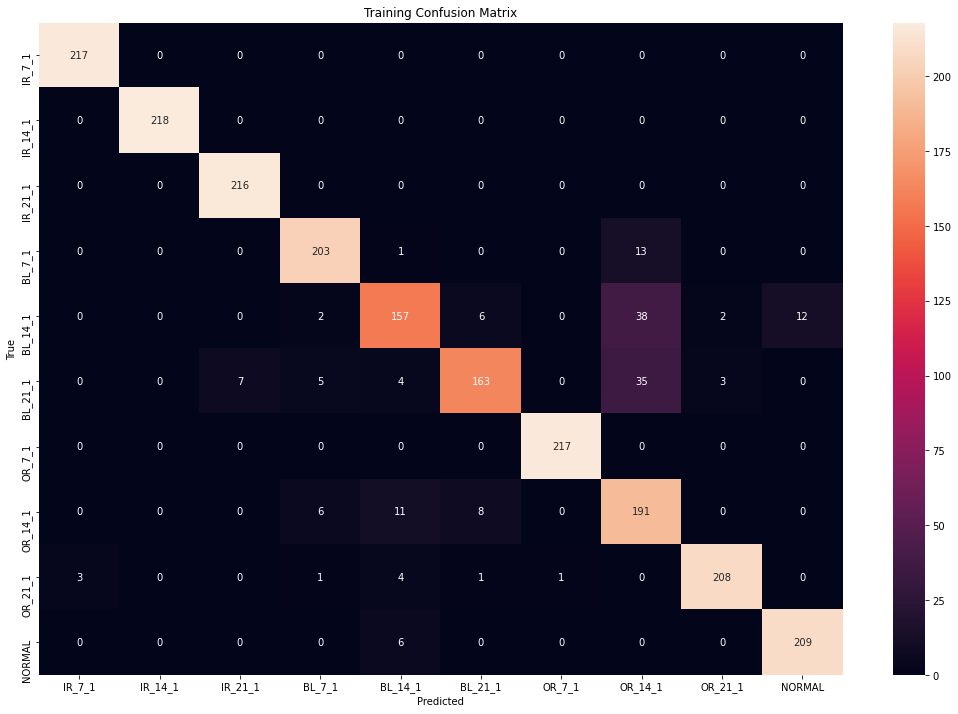

In [125]:

plt.figure(1,figsize=(18,12))
sns.heatmap(train_confusion_matrix, annot= True,xticklabels=fault_type,yticklabels=fault_type,fmt='d')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


Text(140.09375, 0.5, 'True')

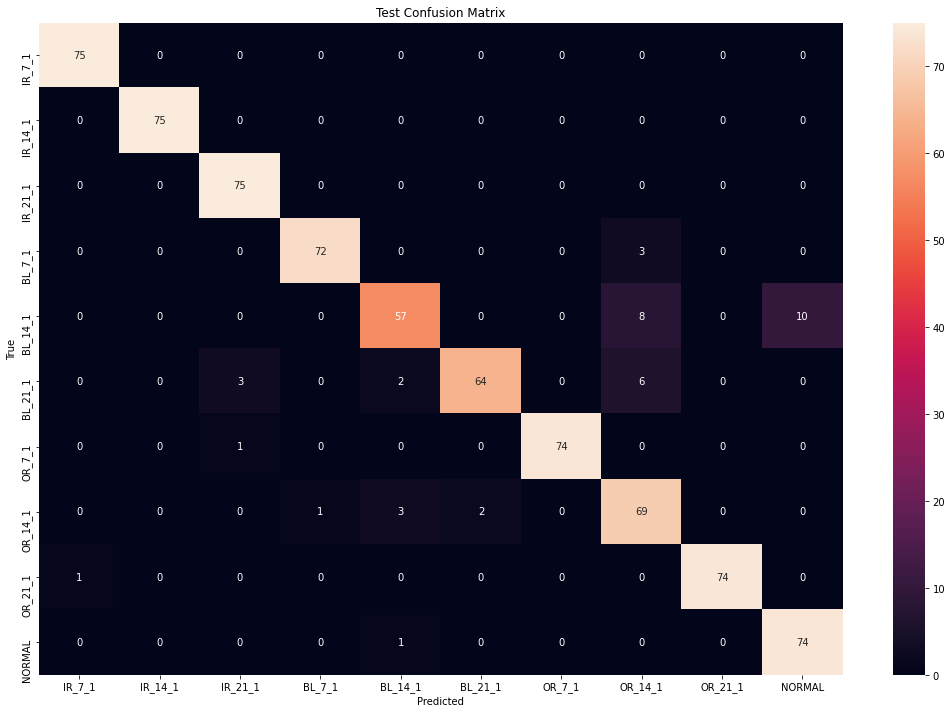

In [122]:
plt.figure(2,figsize=(18,12))
sns.heatmap(test_confusion_matrix, annot = True,xticklabels=fault_type,yticklabels=fault_type)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(140.09375, 0.5, 'True')

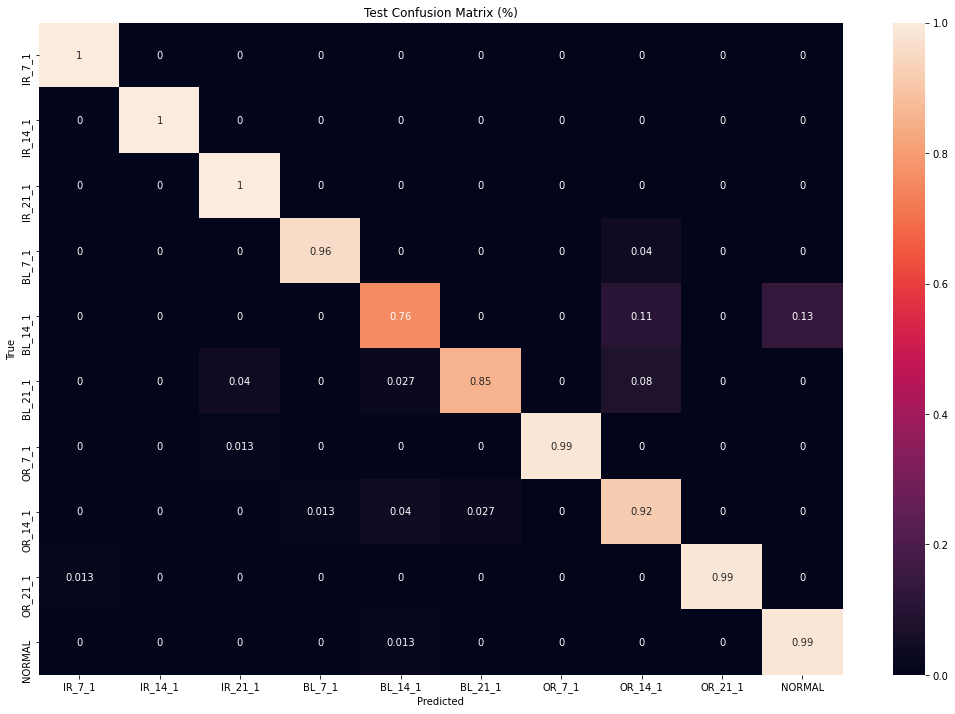

In [124]:
plt.figure(3,figsize=(18,12))
sns.heatmap(test_confusion_matrix/75, annot = True,xticklabels=fault_type,yticklabels=fault_type)
plt.title('Test Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('True')